In [57]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
import string


In [58]:
import os
import random
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from transformers import RobertaTokenizer, RobertaModel, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from typing import Union, List
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# !pip install nltk -U

In [60]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CV\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\CV\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CV\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CV\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [62]:
tweet_data = pd.read_csv('cyberbullying_tweets.csv')

In [63]:
tweet_data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [64]:
tweet_data['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

In [65]:
def extract_emojis(text):
    emojis = re.findall(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]', text)
    return emojis

In [66]:
tweet_data['emojis'] = tweet_data['tweet_text'].apply(extract_emojis)

In [67]:
tweet_data['emojis'][21]

['😘']

In [68]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters, numbers, and punctuations (except for hashtags and @mentions)
    text = re.sub("[^a-zA-Z#@]", " ", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    exclude =string.punctuation
    words = [word for word in words if word not in exclude]

    # Lemmatize words based on POS tags
    lemmatizer = WordNetLemmatizer()
    tagged_words = pos_tag(words)
    lemmatized_words = []
    for word, tag in tagged_words:
        if tag.startswith('NN'):  # Noun
            pos = 'n'
        elif tag.startswith('VB'):  # Verb
            pos = 'v'
        elif tag.startswith('JJ'):  # Adjective
            pos = 'a'
        else:
            pos = 'n'  # Default to noun
        lemmatized_words.append(lemmatizer.lemmatize(word, pos))
    text = ' '.join(lemmatized_words)
    return text



In [69]:
# !pip install --upgrade nltk


In [70]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CV\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [71]:
tweet_data['clean_text']= tweet_data['tweet_text'].apply(preprocess_text)

In [72]:
tweet_data

,tweet_text,cyberbullying_type,emojis,clean_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,[],word katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,[],aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,[],xochitlsuckkks classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,[],jason gio meh p thanks head concern another an...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,[],rudhoeenglish isi account pretend kurdish acco...
...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,[],black ppl expect anything depend anything yet ...
47688,Turner did not withhold his disappointment. Tu...,ethnicity,[],turner withhold disappointment turner call cou...
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,[],swear god dumb nigger bitch get bleach hair re...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,[],yea fuck rt therealexel youre nigger fuck unfo...


In [73]:
# import emoji

In [74]:
# !pip install demoji

In [75]:
import demoji

demoji.download_codes()


C:\Users\CV\AppData\Local\Temp\ipykernel_5172\1306366529.py:3: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [76]:
tweet_data['emojis_description'] = tweet_data['emojis'].apply(lambda x: ' '.join(demoji.findall(' '.join(x)).values()) if x else '')

print(tweet_data['emojis_description'])

0         
1         
2         
3         
4         
        ..
47687     
47688     
47689     
47690     
47691     
Name: emojis_description, Length: 47692, dtype: object


In [77]:
tweet_data['emojis_description']= tweet_data['emojis_description'].apply(preprocess_text)

In [78]:
tweet_data['combined_text'] = tweet_data['clean_text'] + ' ' + tweet_data['emojis_description']

In [79]:
tweet_data['combined_text'][21]

'kid love mohamad bin zayed city face blow kiss'

In [80]:
from transformers import RobertaTokenizer, RobertaModel, get_linear_schedule_with_warmup

import torch


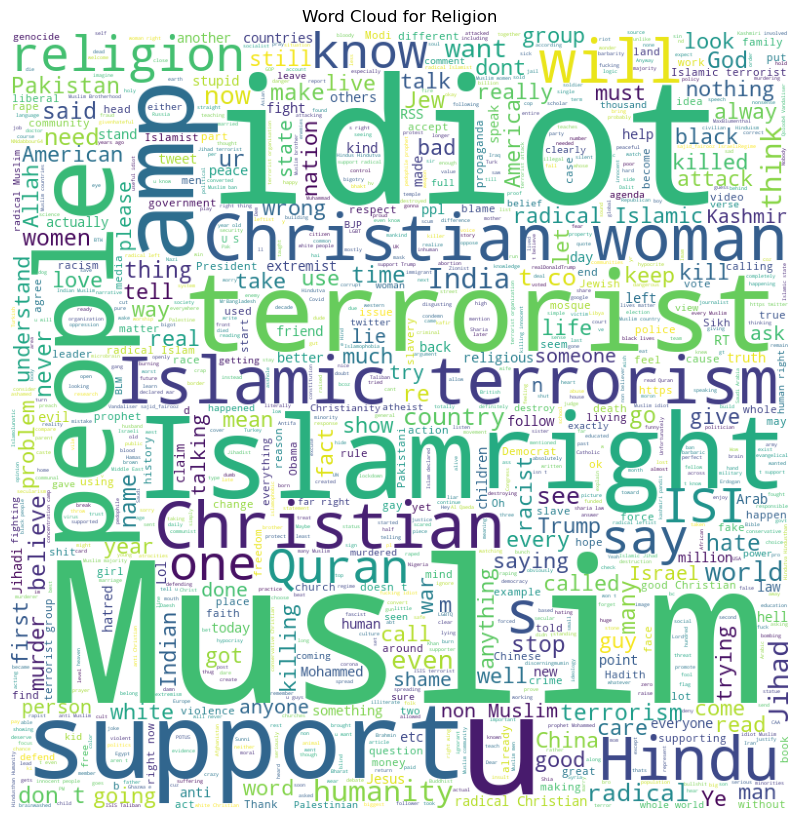

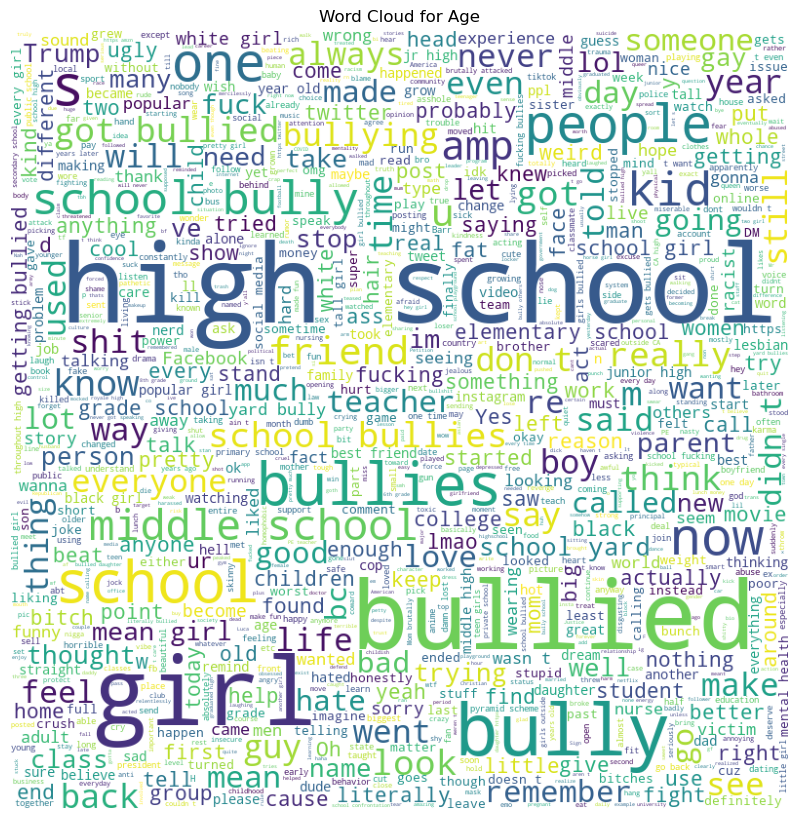

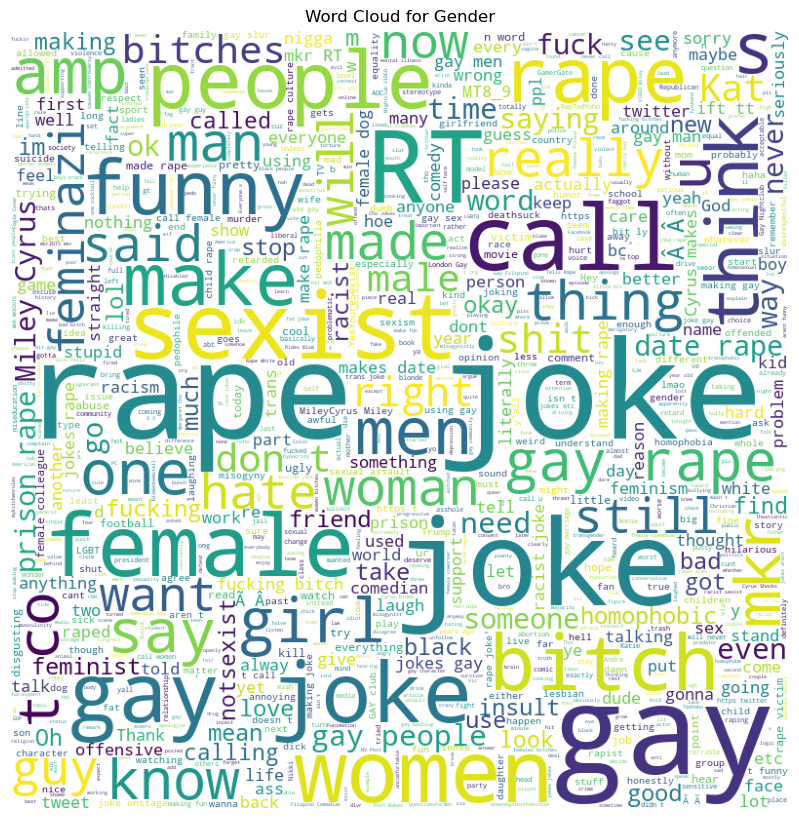

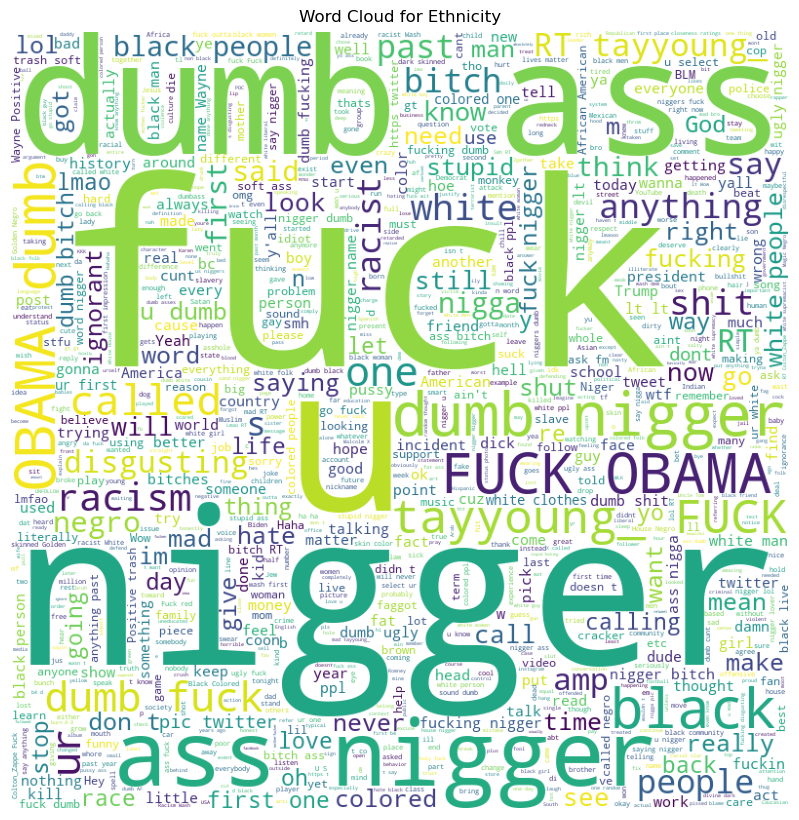

In [ ]:
text_label_0 = ' '.join(tweet_data[tweet_data['cyberbullying_type'] == 'religion']['tweet_text'].values)

text_label_1 = ' '.join(tweet_data[tweet_data['cyberbullying_type'] == 'age']['tweet_text'].values)

text_label_2 = ' '.join(tweet_data[tweet_data['cyberbullying_type'] == 'gender']['tweet_text'].values)

text_label_3 = ' '.join(tweet_data[tweet_data['cyberbullying_type'] == 'ethnicity']['tweet_text'].values)

text_label_4 = ' '.join(tweet_data[tweet_data['cyberbullying_type'] == 'not_cyberbullying']['tweet_text'].values)

text_label_5 = ' '.join(tweet_data[tweet_data['cyberbullying_type'] == 'other_cyberbullying']['tweet_text'].values)

# Generate word cloud for label 0
wordcloud_label_0 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_0)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_0)
plt.axis("off")
plt.title('Word Cloud for Religion')
plt.tight_layout(pad=0)
plt.show()

wordcloud_label_1 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_1)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_1)
plt.axis("off")
plt.title('Word Cloud for Age')
plt.tight_layout(pad=0)
plt.show()


wordcloud_label_2 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_2)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_2)
plt.axis("off")
plt.title('Word Cloud for Gender')
plt.tight_layout(pad=0)
plt.show()


wordcloud_label_3 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_3)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_3)
plt.axis("off")
plt.title('Word Cloud for Ethnicity')
plt.tight_layout(pad=0)
plt.show()


wordcloud_label_4 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_4)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_4)
plt.axis("off")
plt.title('Word Cloud for Not Cyberbullying')
plt.tight_layout(pad=0)
plt.show()


wordcloud_label_5 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_5)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_5)
plt.axis("off")
plt.title('Word Cloud for Other_cyberbullying')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
print(f'There are around {int(tweet_data["combined_text"].duplicated().sum())} duplicated tweets, we will remove them.')

In [ ]:
tweet_data.drop_duplicates("combined_text", inplace=True)

In [ ]:
tweet_data['cyberbullying_type'].value_counts()

In [ ]:
tweet_data['text_len'] = [len(text.split()) for text in tweet_data.tweet_text]

In [ ]:
tweet_data.sort_values(by=['text_len'], ascending=False)

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='text_len', data=tweet_data[tweet_data['text_len']<=1000], palette='Blues_r')
plt.title('Count of tweets vs length ', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [ ]:
tweet_data = tweet_data[tweet_data['text_len'] < tweet_data['text_len'].quantile(0.995)]

In [ ]:
max_len = np.max(tweet_data['text_len'])
max_len 

In [ ]:
MAX_LEN =100

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
label_encoder = LabelEncoder()
tweet_data['cyberbullying_type_label'] = label_encoder.fit_transform(tweet_data['cyberbullying_type'])
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


In [ ]:
labels = torch.tensor(tweet_data['cyberbullying_type_label'].values).long()


In [ ]:
X = tweet_data['combined_text'].values
y = tweet_data['cyberbullying_type_label'].values

In [ ]:
class TextClassificationDataset(Dataset):

    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(text, return_tensors='pt', max_length=self.max_length, padding='max_length', truncation=True)
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label)
        }

In [ ]:
class RoBERTaClassifier(nn.Module):
    def __init__(self, bert_model_name, num_classes):
        super(RoBERTaClassifier, self).__init__()
        self.bert = RobertaModel.from_pretrained(bert_model_name)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        x = self.dropout(pooled_output)
        logits = self.fc(x)
        return logits

In [ ]:
from tqdm import tqdm

def train(model, data_loader, optimizer, scheduler, device):
    model.train()
    total_labels = labels.long()
    labels = labels.long()
    loss = 0
    with tqdm(total=len(data_loader), desc="Training") as progress_bar:
        for batch in data_loader:
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            labels = labels.long()
        labels = labels.long()
        loss = nn.CrossEntropyLoss()(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()
        progress_bar.update(1)
    return total_loss / len(data_loader)

In [ ]:
def evaluate(model, data_loader, device):
    model.eval()
    predictions = list()
    actual = list()
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            predictions.extend(preds.cpu().tolist())
            actual.extend(labels.cpu().tolist())
    return accuracy_score(y_true=actual, y_pred=predictions), classification_report(y_true=actual, y_pred=predictions)

In [ ]:
def predict_class(text, model, tokenizer,classes, max_length=128):
    model.eval()
    encoding = tokenizer(text, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
    input_ids = encoding['input_ids']
    attention_mask = encoding['attention_mask']

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs, dim=1)

    return classes[preds.item()]

In [ ]:
bert_model_name = 'roberta-base'
num_classes = 6
max_length = 128
batch_size = 32
num_epochs = 5
learning_rate = 2e-5

In [ ]:
train_texts, val_texts, train_labels, val_labels = train_test_split(X, y, test_size=0.2, random_state=42)
len(train_texts), len(val_texts), len(train_labels), len(val_labels)

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained(bert_model_name)

train_dataset = TextClassificationDataset(train_texts, train_labels, tokenizer=tokenizer, max_length=max_length)
val_dataset = TextClassificationDataset(val_texts, val_labels, tokenizer=tokenizer, max_length=max_length)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RoBERTaClassifier(bert_model_name, num_classes).to(device)

In [ ]:
optimizer = AdamW(model.parameters(), lr=learning_rate)
total_steps = len(train_dataloader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

In [ ]:
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    train(model, train_dataloader, optimizer, scheduler, device)
    accuracy, report = evaluate(model, val_dataloader, device)
    print(f"Validation Accuracy: {accuracy:.4f}")
    print(report)

In [ ]:
def evaluate2(model, data_loader, device):
    model.eval()
    total_labels = labels.long()
        labels = labels.long()
        loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            labels = labels.long()
        labels = labels.long()
        loss = nn.CrossEntropyLoss()(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return total_loss / len(data_loader), accuracy


In [ ]:
def train(model, train_loader, val_loader, optimizer, scheduler, device, num_epochs):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        total_labels = labels.long()
        labels = labels.long()
        loss = 0
        correct_train = 0
        total_train = 0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            labels = labels.long()
        labels = labels.long()
        loss = nn.CrossEntropyLoss()(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        
        train_labels = labels.long()
        labels = labels.long()
        loss = total_loss / len(train_loader)
        train_losses.append(train_loss)
        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        val_loss, val_accuracy = evaluate2(model, val_loader, device)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss vs Epoch')

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy vs Epoch')

    plt.tight_layout()
    plt.show()

In [ ]:
train(model, train_dataloader, val_dataloader, optimizer, scheduler, device, 5)

In [ ]:
import seaborn as sns

In [ ]:
def evaluate1(model, data_loader, device):
    model.eval()
    predictions = list()
    actual = list()
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            predictions.extend(preds.cpu().tolist())
            actual.extend(labels.cpu().tolist())

    accuracy = accuracy_score(y_true=actual, y_pred=predictions)
    classification_rep = classification_report(y_true=actual, y_pred=predictions)
    confusion_mat = confusion_matrix(y_true=actual, y_pred=predictions)

    # Create a pandas DataFrame for the confusion matrix
    cm_df = pd.DataFrame(confusion_mat, index=range(confusion_mat.shape[0]), columns=range(confusion_mat.shape[1]))

    return accuracy, classification_rep, cm_df

# Usage
accuracy, classification_rep, confusion_mat_df = evaluate1(model, val_dataloader, device)

# Print final classification report
print("Final Classification Report:\n", classification_rep)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat_df, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

# Usage
accuracy, classification_rep, confusion_mat_df = evaluate1(model, train_dataloader, device)

# Print final classification report
print("Train Data Classification Report:\n", classification_rep)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat_df, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
torch.save(model.state_dict(), 'roberta_model.pth')

# Load the model
loaded_model = RoBERTaClassifier(bert_model_name='roberta-base', num_classes=6)
loaded_model.load_state_dict(torch.load('roberta_model.pth'))
loaded_model.eval()

In [ ]:
load_tokenizer = RobertaTokenizer.from_pretrained("'roberta-base'")

In [ ]:
def predict_single_text(text, tokenizer, model):
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
    encoding = tokenizer(text, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
    input_ids = encoding['input_ids']
    attention_mask = encoding['attention_mask']

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs, dim=1)

    return classes[preds.item()]

# Example usage
text = "@MelissaRyan Look at what DC Public Schools are doing for bullying LGBT students now that @m_rhee is..."
prediction = predict_single_text(text, load_tokenizer, loaded_model)
print(prediction)